In [1]:
ls

Backgrounds_Symfit.py                   GeneralPDFSymfit.py
CheckBackgrounds.ipynb                  modelsSymfit.py
Check_complete-Copy1.ipynb              Params/
Check_complete.ipynb                    projectionsSymfit.py
Check_CrystalBall_implementation.ipynb  __pycache__/
CheckProyections.ipynb                  Results/
completeSymfit.py                       Signals_Symfit.py
FitSym.py


In [2]:
import GeneralPDFSymfit as GenPDF
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import symfit
plt.style.use(hep.styles.CMS)

#import GeneralPDFSymfit as GenPDF
#import Signals_Symfit as Signals
#import Backgrounds_Symfit as Backgrounds
import completeSymfit as Complete
from importlib import reload

In [3]:
parameters_1Bin = {
    'Signal':{
        'yield':1356,
        'mass':{
            '2Gaussian+CrystalBall':{
                'muCB':5.27,
                'alphaCB':5.2,
                'sigmaCB':0.04,
                'nCB':3,
                'muGauss':5.27,
                'sigmaGauss1': 0.10,
                'sigmaGauss2':0.03,
                'fracCB' : 0.05,
                'fracGauss1':0.25,
                'fracGauss2':0.25
            }
        },
        'angle':{
            'AFB':0, 'FH':0.2,
            'coefsEff':[ 1, 0.1, -0.2, 0.3, -0.4]
        },
    },
    'Background':{
        'yield':1000,
        'mass':{
            'Exponential+Gauss':{
                'mu':5,
                'sigma':0.5,
                'lambda_':-2,
                'fraction_exp':0.3
            }
        },
        'angle':{
            '2SideBands':{
                'Left':{
                    'coefs':[1,0.1,0.1],   'fraction_Cheby':0.5,
                    'mu':-0.75,           'sigma':0.1
                },
                'Right':{
                    'coefs':[1, -0.2,-0.2],  'fraction_Cheby':0.5,
                    'mu':0.75,            'sigma':0.1
                },
                'fraction_Left':0.5
            },
        }
        
    },
    'limits': [5, 5.7]
}

In [8]:
Complete = reload(Complete)
free = {'Signal:angle:AFB':[0,-1.5,1.5], 'Signal:angle:FH':[0.2,0,3],
        'Background:angle:2SideBands:fraction_Left':[0.5, 0, 1]}
obj = Complete.complete_v1(1, parameters_1Bin, free_Params=free )

couldn't reduce degree in a polynomial division algorithm when dividing [-1.30794678474867e-111*_u**4 - 5.48201386489442e-95*_u**2 - 2.49414662735738e-79*_u, 0.0] by [-5.01354243811716e-186*_u**9 - 1.26079942143561e-168*_u**7 + 5.73624712057953e-153*_u**6 - 7.92660678907784e-152*_u**5 + 2.40424049465593e-136*_u**4 + 2.73463752048428e-120*_u**3 + 9.16937660006466e-104*_u + 2.78118835956421e-88]. This can happen when it's not possible to detect zero in the coefficient domain. The domain of computation is RR[_u]. Zero detection is guaranteed in this coefficient domain. This may indicate a bug in SymPy or the domain is user defined and doesn't implement zero detection properly.
falling back to numeric integration
9.973556585920894
algo
couldn't reduce degree in a polynomial division algorithm when dividing [-1.30794678474867e-111*_u**4 - 5.48201386489442e-95*_u**2 - 2.49414662735738e-79*_u, 0.0] by [-5.01354243811716e-186*_u**9 - 1.26079942143561e-168*_u**7 + 5.73624712057953e-153*_u**6 - 

In [6]:
obj.Params['Background']['angle']['2SideBands']['fraction_Left'].name

'fraction_Left'

In [10]:
obj.symParams('FH')

FH

In [11]:
obj.pdf

Frac*(AFB*cos + 0.5*FH + (0.75 - 0.75*FH)*(1 - cos**2))*(0.906686962356445*Piecewise((exp(-8679.03125*(0.189753320683112*mass - 1)**2), 25.0*mass - 131.75 > -5.2), (1.25597134469893e-13/(1 - 0.196653858953801*mass)**3, True)) + 6.04458000608229*exp(-15429.3888888889*(0.189753320683112*mass - 1)**2) + 1.81969838851935*exp(-1388.645*(0.189753320683112*mass - 1)**2))*(-1.46341463414634*cos**4 + 0.548780487804878*cos**3 + 1.28048780487805*cos**2 - 0.365853658536585*cos + 0.365853658536585)/(-0.024390243902439*AFB + 0.00348432055749137*FH + 0.496515679442509) + (1 - Frac)*(fraction_Left*(0.0517241379310345*cos**2 + 0.0258620689655172*cos + 0.232758620689655 + 2.00717528880078*exp(-50.0*(cos + 0.75)**2)) + (1 - fraction_Left)*(-0.09375*cos**2 - 0.046875*cos + 0.28125 + 2.00717528880078*exp(-50.0*(cos - 0.75)**2)))*(897802173625549.0*exp(-2.0*(mass - 5)**2) + 0.3*exp(-2*mass)/(-exp(-2)/2 + exp(2)/2))

In [94]:
obj.projection_mass

Frac*(0.906686962356445*Piecewise((exp(-8679.03125*(0.189753320683112*mass - 1)**2), 25.0*mass - 131.75 > -5.2), (1.25597134469893e-13/(1 - 0.196653858953801*mass)**3, True)) + 6.04458000608229*exp(-15429.3888888889*(0.189753320683112*mass - 1)**2) + 1.81969838851935*exp(-1388.645*(0.189753320683112*mass - 1)**2)) + (1 - Frac)*(1.332207666176*exp(-2.0*(mass - 5)**2) + 0.3*exp(-2*mass)/(-5.59774242129547e-6 + exp(-10)/2))

In [95]:
obj.mass_signal

Frac*(0.906686962356445*Piecewise((exp(-8679.03125*(0.189753320683112*mass - 1)**2), 25.0*mass - 131.75 > -5.2), (1.25597134469893e-13/(1 - 0.196653858953801*mass)**3, True)) + 6.04458000608229*exp(-15429.3888888889*(0.189753320683112*mass - 1)**2) + 1.81969838851935*exp(-1388.645*(0.189753320683112*mass - 1)**2))

In [96]:
obj.mass_background

(1 - Frac)*(1.332207666176*exp(-2.0*(mass - 5)**2) + 0.3*exp(-2*mass)/(-5.59774242129547e-6 + exp(-10)/2))

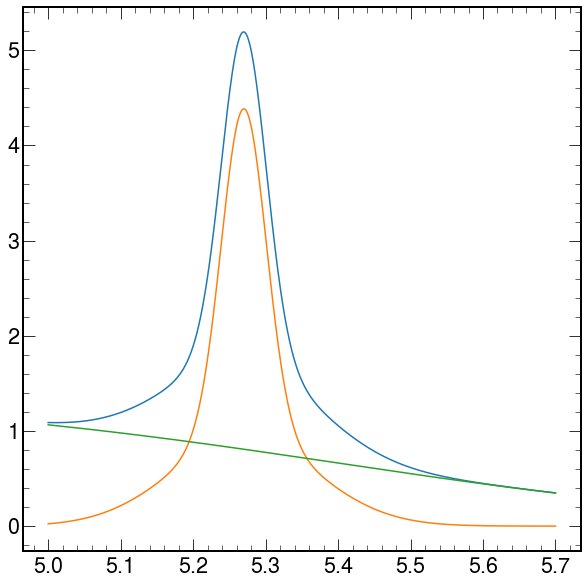

In [97]:
m_ = np.linspace(5,5.7, 2800)
plt.plot(m_, obj.projection_mass(m_, Frac = 0.5))
plt.plot(m_, obj.mass_signal(m_, Frac = 0.5))
plt.plot(m_, obj.mass_background(m_, Frac = 0.5))

In [48]:
obj.projection_angular

Frac*(AFB*cos + 0.5*FH + (0.75 - 0.75*FH)*(1 - cos**2))*(-1.46341463414634*cos**4 + 0.548780487804878*cos**3 + 1.28048780487805*cos**2 - 0.365853658536585*cos + 0.365853658536585)/(-0.024390243902439*AFB + 0.00348432055749137*FH + 0.496515679442509) + (1 - Frac)*(fraction_Left*(0.0517241379310345*cos**2 + 0.0258620689655172*cos + 0.232758620689655 + 2.00717528880078*exp(-50.0*(cos + 0.75)**2)) + (1 - fraction_Left)*(-0.09375*cos**2 - 0.046875*cos + 0.28125 + 2.00717528880078*exp(-50.0*(cos - 0.75)**2)))

In [49]:
obj.angular_signal

Frac*(AFB*cos + 0.5*FH + (0.75 - 0.75*FH)*(1 - cos**2))*(-1.46341463414634*cos**4 + 0.548780487804878*cos**3 + 1.28048780487805*cos**2 - 0.365853658536585*cos + 0.365853658536585)/(-0.024390243902439*AFB + 0.00348432055749137*FH + 0.496515679442509)

In [50]:
obj.angular_back

(1 - Frac)*(fraction_Left*(0.0517241379310345*cos**2 + 0.0258620689655172*cos + 0.232758620689655 + 2.00717528880078*exp(-50.0*(cos + 0.75)**2)) + (1 - fraction_Left)*(-0.09375*cos**2 - 0.046875*cos + 0.28125 + 2.00717528880078*exp(-50.0*(cos - 0.75)**2)))

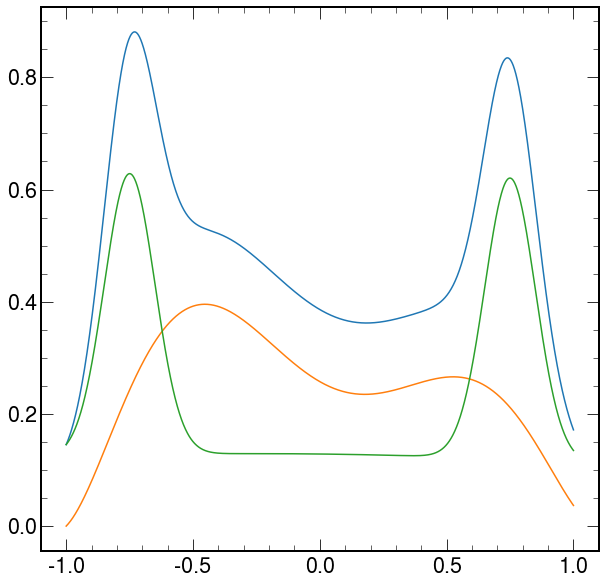

In [51]:
t_ = np.linspace(-1, 1, 2000)
plt.plot(t_, obj.projection_angular(t_, Frac = 0.5, AFB = 0, FH= 0.2, fraction_Left=0.5))
plt.plot(t_, obj.angular_signal(t_, Frac = 0.5, AFB = 0, FH= 0.2))
plt.plot(t_, obj.angular_back(t_, Frac = 0.5, AFB = 0, FH= 0.2, fraction_Left=0.5))